# EDA - Dataset de Videojuegos

Este notebook realiza un flujo básico de EDA: carga, exploración, limpieza y visualizaciones.

In [14]:
# Imports
import pandas as pd


In [15]:
# Cargar dataset
df = pd.read_csv("data/Latest_2025_movies_Datasets.csv")

In [16]:
# Ver primeras filas
df.head()

,Unnamed: 0,title,release_date,original_language,popularity,vote_count,vote_average,overview
0,0,Our Fault,2025-10-15,es,1096.6654,302,7.869,Jenna and Lion's wedding brings about the long...
1,1,Inside Furioza,2025-10-14,pl,384.3220,27,6.593,"In the wake of murder, new Furioza leader Gold..."
2,2,Captain Hook - The Cursed Tides,2025-07-11,en,370.1091,15,5.000,In the aftermath of a devastating defeat by hi...
3,3,War of the Worlds,2025-07-29,en,327.8760,642,4.400,Will Radford is a top analyst for Homeland Sec...
4,4,The Conjuring: Last Rites,2025-09-03,en,284.0186,1065,6.972,Paranormal investigators Ed and Lorraine Warre...


In [17]:
# Información general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         10000 non-null  int64  
 1   title              10000 non-null  object 
 2   release_date       9951 non-null   object 
 3   original_language  10000 non-null  object 
 4   popularity         10000 non-null  float64
 5   vote_count         10000 non-null  int64  
 6   vote_average       10000 non-null  float64
 7   overview           9758 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 625.1+ KB


In [18]:
# Estadísticas numéricas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,10000.0,4999.500000,2886.895680,0.0000,2499.750000,4999.50000,7499.250000,9999.0000
popularity,10000.0,7.085813,16.379058,2.6167,4.499975,4.97535,6.172225,1096.6654
vote_count,10000.0,1470.490600,3405.494983,0.0000,4.000000,71.00000,1173.250000,38078.0000
vote_average,10000.0,5.538950,2.417306,0.0000,5.113750,6.30000,7.011000,10.0000


In [19]:
# Nulls
nulos = df.isnull().sum().to_frame("nulos")
nulos["porcentaje"] = (nulos["nulos"] / len(df) * 100).round(2)
nulos.sort_values("nulos", ascending=False)

# Duplicados
df.duplicated().sum()


np.int64(0)

## Limpieza y normalización
- Asegurar tipos correctos.
- Tratar valores nulos si existen.
- Normalizar formatos (ej. nombres de plataformas).

In [ ]:
df = df.drop_duplicates()

# 2) Conversión de tipos (dependiendo del contenido de cada columna)
# Justificación: trabajar con el tipo correcto permite análisis numéricos y gráficos apropiados.

# Convertimos posibles columnas numéricas guardadas como texto
for col in df.columns:
    if df[col].dtype == "object":
        # Intentamos convertir a número, si falla se queda como texto
        conv = pd.to_numeric(df[col], errors='coerce')
        # Si muchos valores pudieron convertirse, lo dejamos como numérico
        if conv.notnull().sum() > 0:
            df[col] = conv

# Convertimos posibles columnas de fecha
for col in df.columns:
    if "date" in col.lower() or "release" in col.lower():
        # Justificación: convertir a datetime permite análisis temporales
        df[col] = pd.to_datetime(df[col], errors='coerce')

# 3) Tratamiento de nulos
# Justificación: imputar solo cuando hay pocos nulos evita introducir sesgo.

# Para columnas numéricas: imputamos mediana si faltan menos del 5%
for col in df.select_dtypes(include="number").columns:
    pct = df[col].isnull().mean()
    if 0 < pct < 0.05:
        df[col] = df[col].fillna(df[col].median())

# Para columnas categóricas: rellenamos con "Unknown" si faltan pocos valores
for col in df.select_dtypes(include="object").columns:
    pct = df[col].isnull().mean()
    if 0 < pct < 0.05:
        df[col] = df[col].fillna("Unknown")

# 4) Normalización de categorías
# Justificación: uniformar texto evita que valores iguales aparezcan como distintos.
for col in df.select_dtypes(include="object").columns:
    df[col] = df[col].astype(str).str.strip().str.title()

# 5) Conversión final de categorías
# Justificación: reduce memoria y mejora futuras operaciones.
for col in df.select_dtypes(include="object").columns:
    df[col] = df[col].astype("category")

# Vista previa final
df.head()

,Unnamed: 0,title,release_date,original_language,popularity,vote_count,vote_average,overview
0,0,Our Fault,2025-10-15,es,1096.6654,302,7.869,Jenna and Lion's wedding brings about the long...
1,1,Inside Furioza,2025-10-14,pl,384.3220,27,6.593,"In the wake of murder, new Furioza leader Gold..."
2,2,Captain Hook - The Cursed Tides,2025-07-11,en,370.1091,15,5.000,In the aftermath of a devastating defeat by hi...
3,3,War of the Worlds,2025-07-29,en,327.8760,642,4.400,Will Radford is a top analyst for Homeland Sec...
4,4,The Conjuring: Last Rites,2025-09-03,en,284.0186,1065,6.972,Paranormal investigators Ed and Lorraine Warre...


## Visualizaciones

1) Histograma de `Sales_Global` (ventas globales estimadas en millones)

In [21]:
# Histograma de Sales_Global
plt.figure(figsize=(8,5))
plt.hist(df['Sales_Global'].dropna(), bins=8)
plt.title('Distribución de Sales_Global (millones)')
plt.xlabel('Sales_Global (millones)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

NameError: name 'plt' is not defined

2) Gráfica de barras: publishers con más ventas totales

C:\Users\dani\AppData\Local\Temp\ipykernel_2856\1567903477.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_publisher = df.groupby('Publisher', as_index=False)['Sales_Global'].sum().sort_values('Sales_Global', ascending=False)


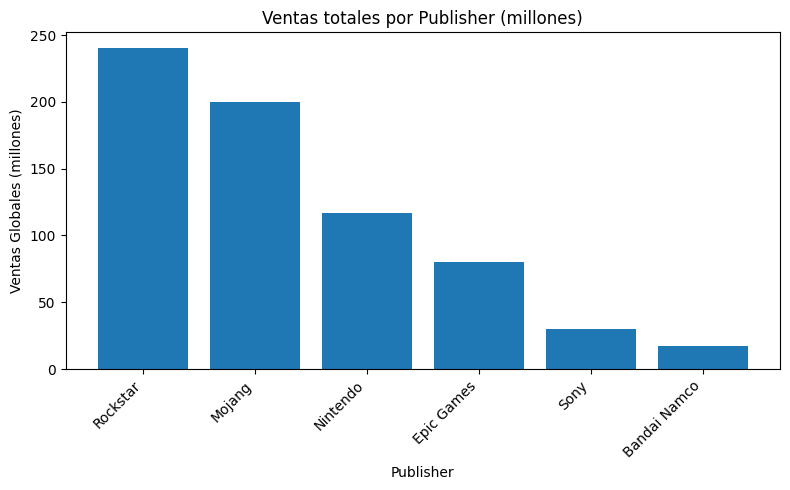

In [ ]:
# Ventas totales por publisher (ordenadas)
sales_by_publisher = df.groupby('Publisher', as_index=False)['Sales_Global'].sum().sort_values('Sales_Global', ascending=False)
sales_by_publisher

plt.figure(figsize=(8,5))
plt.bar(sales_by_publisher['Publisher'], sales_by_publisher['Sales_Global'])
plt.title('Ventas totales por Publisher (millones)')
plt.xlabel('Publisher')
plt.ylabel('Ventas Globales (millones)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

3) Boxplot: Distribución de `Rating` por `Genre`

C:\Users\dani\AppData\Local\Temp\ipykernel_2856\872521432.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=genres, showfliers=True)


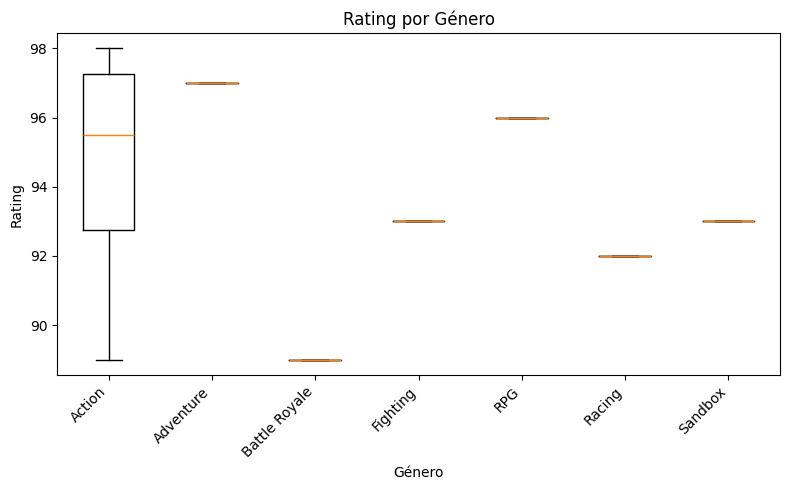

In [ ]:
# Boxplot Rating por Genre
plt.figure(figsize=(8,5))
# preparar datos para boxplot: lista de series por género
genres = df['Genre'].cat.categories.tolist()
data_to_plot = [df.loc[df['Genre']==g, 'Rating'] for g in genres]
plt.boxplot(data_to_plot, labels=genres, showfliers=True)
plt.title('Rating por Género')
plt.xlabel('Género')
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

4) Línea temporal: ventas por año (si aplica)

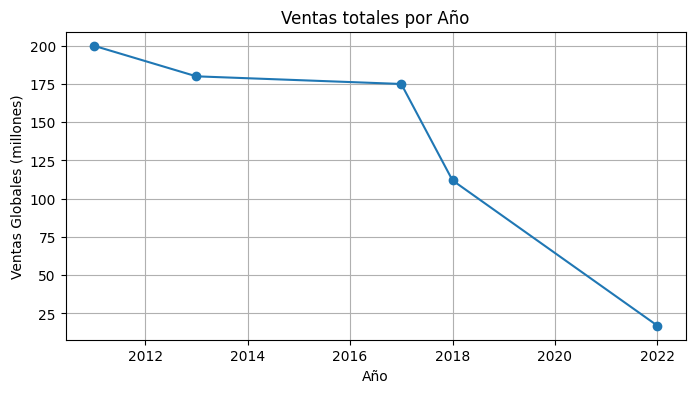

In [ ]:
# Ventas por año
sales_by_year = df.groupby('Year', as_index=False)['Sales_Global'].sum().sort_values('Year')
sales_by_year

plt.figure(figsize=(8,4))
plt.plot(sales_by_year['Year'], sales_by_year['Sales_Global'], marker='o')
plt.title('Ventas totales por Año')
plt.xlabel('Año')
plt.ylabel('Ventas Globales (millones)')
plt.grid(True)
plt.show()

## Conclusiones exploratorias

- Resumen de las principales características detectadas en el dataset.
- Principales hallazgos y limpieza aplicada.

(Completa con tus observaciones personales al entregar el ejercicio.)